# Project: The Effect of the External Debt on Nation's' Econmic Development 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


> In this analysis, we will analyze the effect of external borrowing on countries economic proformence and welfare of its citizen. We will use four different economic factors which are the extrenal debt Gross national income ratio, GDP growth, Income per person and Trade balance. We will use the datasets provided by [Gapminder](https://www.gapminder.org/data/) for three of the indicators. And debt to Gross national income ratio will be our external borrowing indicator. However, it is not directly available on Gapminder, so will create it from the available data sets of some indicators (Income per person, Population and External debt) on Gapminder. 
Income per person will represent the citizen benefits for borrowing, if they are directly correlated or not.
GDP growth will represent the country benefits for borrowing, if they are directly correlated or not.
Trade balance will represent the profits that the economy will gain, if it will increase with increasing in debt raito.


In [1]:
# import statements for the packages that will be used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re #for encoding data with abv.
from matplotlib.lines import Line2D
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load datasets and make a preliminary check
# Debt dataset 
df_debt = pd.read_csv('external_debt_total_us_not_inflation_adjusted.csv')
df_debt.head(2)

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.49B,2.58B,2.59B,2.53B,2.6B,2.6B,2.75B,2.68B,2.66B,3.04B
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.4B,36.9B,44.1B,46.5B,49.3B,57.8B,59.2B,63.2B,64.4B,67.3B


In [3]:
df_debt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 52 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  123 non-null    object
 1   1970     81 non-null     object
 2   1971     82 non-null     object
 3   1972     84 non-null     object
 4   1973     84 non-null     object
 5   1974     84 non-null     object
 6   1975     84 non-null     object
 7   1976     84 non-null     object
 8   1977     85 non-null     object
 9   1978     87 non-null     object
 10  1979     87 non-null     object
 11  1980     88 non-null     object
 12  1981     97 non-null     object
 13  1982     97 non-null     object
 14  1983     97 non-null     object
 15  1984     98 non-null     object
 16  1985     99 non-null     object
 17  1986     99 non-null     object
 18  1987     99 non-null     object
 19  1988     99 non-null     object
 20  1989     100 non-null    object
 21  1990     100 non-null    object
 22  19

In [4]:
# Population dataset 
df_popu = pd.read_csv('population_total.csv')
df_popu.head(2)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,...,76.6M,76.4M,76.3M,76.1M,76M,75.8M,75.6M,75.4M,75.2M,74.9M
1,Angola,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,...,168M,170M,172M,175M,177M,179M,182M,184M,186M,188M


In [5]:
df_popu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Columns: 302 entries, country to 2100
dtypes: object(302)
memory usage: 464.9+ KB


In [6]:
# Income dataset
df_income = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
df_income.head(2)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,Afghanistan,683,683,683,683,683,683,683,683,683,...,2690,2750,2810,2870,2930,2990,3060,3120,3190,3260
1,Angola,700,702,705,709,711,714,718,721,725,...,8000,8170,8350,8530,8710,8900,9090,9280,9480,9690


In [7]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 252 entries, country to 2050
dtypes: int64(101), object(151)
memory usage: 384.0+ KB


In [8]:
# GDP Growth dataset
df_growth = pd.read_csv('gdppercapita_growth_percent_per_year.csv')
df_growth.head(2)

,country,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.06,−1.87,3.59,−0.291,5.13,1.59,1.52,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,−2.68,8.97,1.97,−0.665,−1.62,−0.541,0.0648,−1.19,1.54,−4.58


In [9]:
df_growth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 61 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  212 non-null    object
 1   1961     92 non-null     object
 2   1962     96 non-null     object
 3   1963     96 non-null     object
 4   1964     96 non-null     object
 5   1965     96 non-null     object
 6   1966     102 non-null    object
 7   1967     105 non-null    object
 8   1968     106 non-null    object
 9   1969     108 non-null    object
 10  1970     105 non-null    object
 11  1971     116 non-null    object
 12  1972     116 non-null    object
 13  1973     116 non-null    object
 14  1974     116 non-null    object
 15  1975     118 non-null    object
 16  1976     120 non-null    object
 17  1977     122 non-null    object
 18  1978     128 non-null    object
 19  1979     128 non-null    object
 20  1980     129 non-null    object
 21  1981     141 non-null    object
 22  19

In [10]:
# Trade balance dataset
df_trade = pd.read_csv('trade_balance_us_not_inflation_adjusted.csv')
df_trade.head(2)

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,−407M,−436M,−240M,−177M,−3.79M,41.8M,40M,−26.5M,NaN,NaN
1,Afghanistan,−15.6M,−20M,−24.4M,−57.8M,−73.3M,−102M,−140M,−124M,−86.7M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_trade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 62 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  197 non-null    object
 1   1960     60 non-null     object
 2   1961     64 non-null     object
 3   1962     65 non-null     object
 4   1963     65 non-null     object
 5   1964     66 non-null     object
 6   1965     73 non-null     object
 7   1966     75 non-null     object
 8   1967     78 non-null     object
 9   1968     79 non-null     object
 10  1969     80 non-null     object
 11  1970     101 non-null    object
 12  1971     101 non-null    object
 13  1972     102 non-null    object
 14  1973     102 non-null    object
 15  1974     103 non-null    object
 16  1975     107 non-null    object
 17  1976     110 non-null    object
 18  1977     111 non-null    object
 19  1978     111 non-null    object
 20  1979     110 non-null    object
 21  1980     121 non-null    object
 22  19

### Data Cleaning (Preparing the datasets exploration )

In [12]:
# Our independent variable will be debt/income 
# it is not avaiable directly on Gapminder 
# we will use the country with non NaN values across years to be our population  
# population that will be used to use later to select four countries  
selected = df_debt['1970'].isnull() == False
df_debt = df_debt[selected]

In [13]:
# we will reset index due to the droped row from pervios operation
df_debt.reset_index(drop= True, inplace= True)

In [14]:
# defining a function for converting string number with abv. billion "K" , million "K"  and thouthand "K" to float
def converter(x):
    def converter_y(y):
        
        if 'k' in y:
            return float(re.sub(r'[^\x00-\x7F]+','-', y.strip('k')))*1000
        elif 'M' in y:
            return float(re.sub(r'[^\x00-\x7F]+','-', y.strip('M')))*1000000
        elif 'B' in y:
            return float(re.sub(r'[^\x00-\x7F]+','-', y.strip('B')))*1000000000
        elif '0' == y:
            return float(re.sub(r'[^\x00-\x7F]+','-', y))
        else:
            return float(re.sub(r'[^\x00-\x7F]+','-', y))
    for column in x.columns.tolist()[1:]:
        x[column] = [str(i).replace("−", "-") for i in x[column]]
        x[column] = x[column].apply(converter_y)
        
    
    for column in x.columns.tolist():
        try:
            x[column] = x[column].astype(float)
        except:
            continue

In [15]:
# defining a function for filtering countries based on our remained countries from population per each indicator
def selecting_sample(x):
    x = x[x.country.isin(sample_country)]
    x = x.reset_index( drop =True)
    x = x[year]
    return x

In [16]:
# extracting the countries that remained after droping the NaN from Population
# TO select and filter them in other indicators
# Added the country to the list to select as it is still column with the years
sample_country = df_debt.country.tolist()
year = ['country']
for i in range(1970,2021):
    year.append(str(i))

In [17]:
# applying the def. for filtering indicators
df_popu = selecting_sample(df_popu)
df_trade = selecting_sample(df_trade)
df_income = selecting_sample(df_income)
df_growth = selecting_sample(df_growth)

In [18]:
# applying the def. function for converting string to float
converter(df_debt)
converter(df_popu)
converter(df_income)
# as the function for converting string number did not work with trade balance
# because the NaN values in trade balance data set will make this operation
df_trade.dropna(inplace=True)
converter(df_trade)

In [19]:
# setting country as index 
df_income.set_index('country',inplace=True)
df_trade.set_index('country',inplace=True)
df_growth.set_index('country',inplace=True)

In [20]:
# calculating Debt/gdp ratio (%)
debt_percentage = df_debt.sort_values('country').groupby('country').sum()*100/(df_income.sort_values('country').groupby('country').sum()*df_popu.sort_values('country').groupby('country').sum())

In [21]:
# selected country from cleaned population
selected_debt = debt_percentage.filter(items = ["Argentina", "Egypt",'Morocco','Turkey'], axis=0)
selected_income = df_income.filter(items = ["Argentina", "Egypt",'Morocco','Turkey'], axis=0)
selected_growth = df_growth.filter(items = ["Argentina", "Egypt",'Morocco','Turkey'], axis=0)
selected_trade = df_trade.filter(items = ["Argentina", "Egypt",'Morocco','Turkey'], axis=0)/1000000000


In [22]:
# growth indicator have inconsistance
# plot error see it as non numrical data
#so we need to apply both funtion below
converter(selected_growth)

In [23]:
selected_debt

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
country,,,,,,,,,,,,,,,,,,,,,
Argentina,1.711413,1.753805,1.835180,1.846701,1.820728,1.848602,2.229733,2.577660,3.094130,4.534759,...,14.075080,13.897437,14.567633,15.317896,17.182965,18.034086,21.813830,27.582649,28.482547,28.525223
Egypt,2.038043,2.199760,2.023094,1.990020,2.108658,4.148986,4.665356,7.560484,7.731403,8.268682,...,4.044350,4.494786,5.106972,4.435415,5.084538,6.787508,7.987552,8.914563,9.745763,10.784314
Morocco,2.206541,2.417629,2.509066,2.653229,2.961830,4.899613,5.611410,8.976575,10.782847,12.310691,...,14.028131,15.400970,17.074262,18.237828,17.945847,19.073493,19.597596,18.791946,19.994557,25.435540
Turkey,1.417204,1.533392,1.532299,1.712538,1.724934,1.712143,1.842639,3.342955,4.154121,4.396759,...,19.036244,20.080321,21.320913,21.120752,19.598236,19.414065,20.197199,19.149110,18.750957,18.147385


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Debt effect on Income 

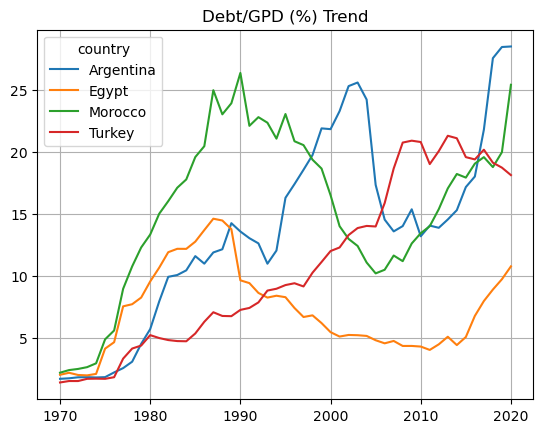

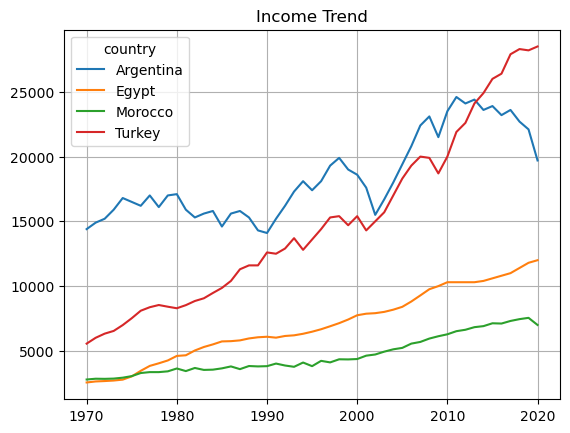

In [24]:
selected_debt.T.plot(kind='line', title='Debt/GPD (%) Trend', grid=True)
selected_income.T.plot(kind='line', title='Income Trend', grid=True);

### Debt effect on Trade Balance

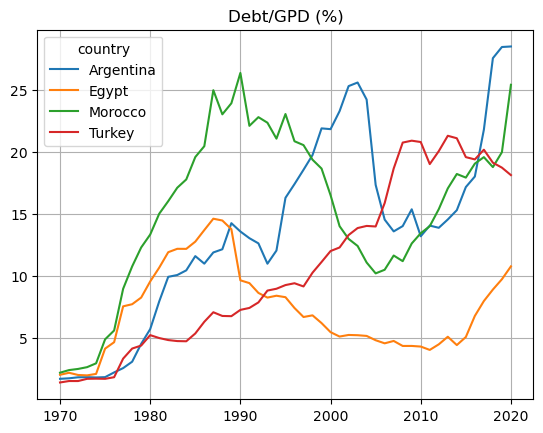

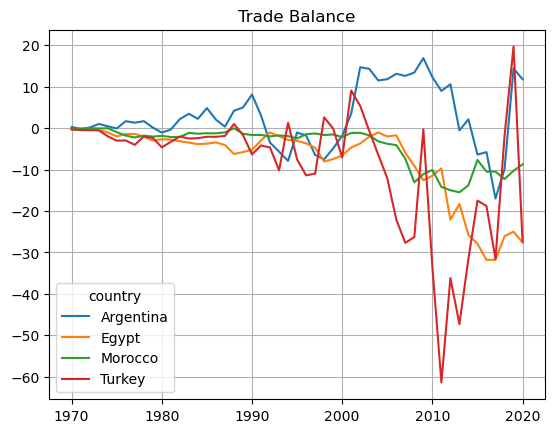

In [25]:
selected_debt.T.plot(kind='line', title='Debt/GPD (%)', grid=True)
selected_trade.T.plot(kind='line', title='Trade Balance', grid=True);

### Debt effect on Econmy growth 

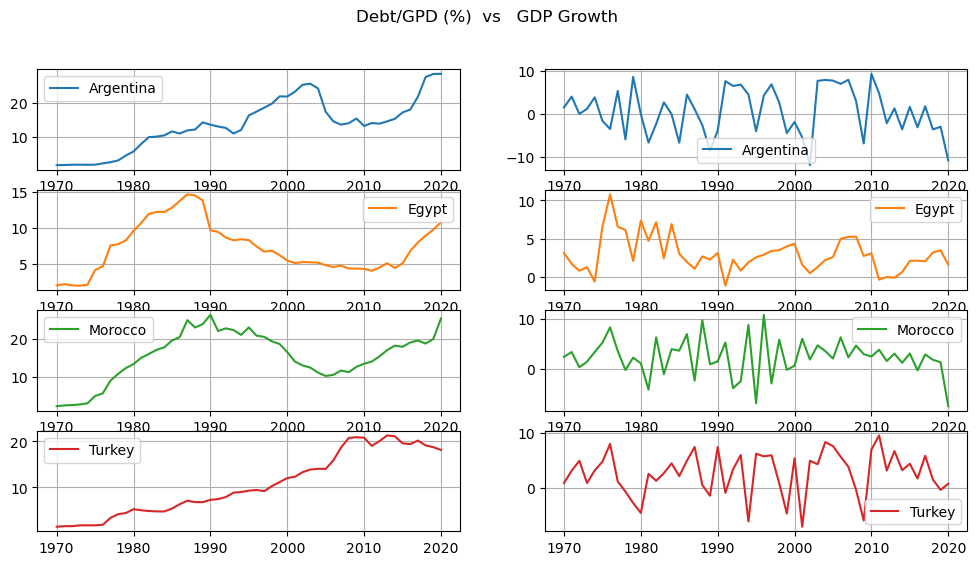

In [26]:
fig, axes = plt.subplots(nrows=4,ncols=2,figsize=(12,6))
selected_debt.T.plot(kind='line',ax = axes[:,0], title='Debt/GPD (%) Trend',subplots=True, grid=True)
selected_growth.T.plot( kind='line',ax = axes[:,1], title='Debt/GPD (%)  vs   GDP Growth',subplots=True, grid=True);

### Alternative Visualization for communicating results

In [33]:
# Perparing the dataset to fit in plot funcation:

selected_debt = debt_percentage.filter(items = ["Argentina", "Egypt",'Morocco','Turkey'], axis=0)
selected_income = df_income.filter(items = ["Argentina", "Egypt",'Morocco','Turkey'], axis=0)
selected_growth = df_growth.filter(items = ["Argentina", "Egypt",'Morocco','Turkey'], axis=0)
selected_trade = df_trade.filter(items = ["Argentina", "Egypt",'Morocco','Turkey'], axis=0)/1000000000

List_= ["Argentina", "Egypt",'Morocco','Turkey']
List_2= ["income", "trade",'growth']
List_3= [selected_debt, selected_income ,selected_trade,selected_growth]
List_4= ['Debt',"income", "trade",'growth']
xx = 0
for x in List_3:
    if xx >= 1: 
        x.insert(0, 'Indictor', List_4[xx].title())
    xx += 1
    x.reset_index(inplace = True)
all_data = pd.concat([selected_income ,selected_trade,selected_growth],ignore_index= True)
selected_debt = selected_debt.melt(id_vars=["country"], 
        var_name="Year", 
        value_name="Debt")
all_data = all_data.melt(id_vars=["country", "Indictor"], 
        var_name="Year", 
        value_name="Value")
all_data = pd.merge(all_data,selected_debt,on=['country', 'Year'],how='outer')
all_data['Value'] = [float(str(i).replace("−", "-")) for i in all_data['Value']]
all_data['Value'] = all_data['Value'].astype(float)
all_data

,country,Indictor,Year,Value,Debt
0,Argentina,Income,1970,14400.000,1.711413
1,Argentina,Trade,1970,0.273,1.711413
2,Argentina,Growth,1970,1.480,1.711413
3,Egypt,Income,1970,2560.000,2.038043
4,Egypt,Trade,1970,-0.284,2.038043
...,...,...,...,...,...
607,Morocco,Trade,2020,-8.750,25.435540
608,Morocco,Growth,2020,-7.430,25.435540
609,Turkey,Income,2020,28500.000,18.147385
610,Turkey,Trade,2020,-27.400,18.147385


C:\Users\305391\AppData\Local\Temp\ipykernel_23032\3149891647.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)


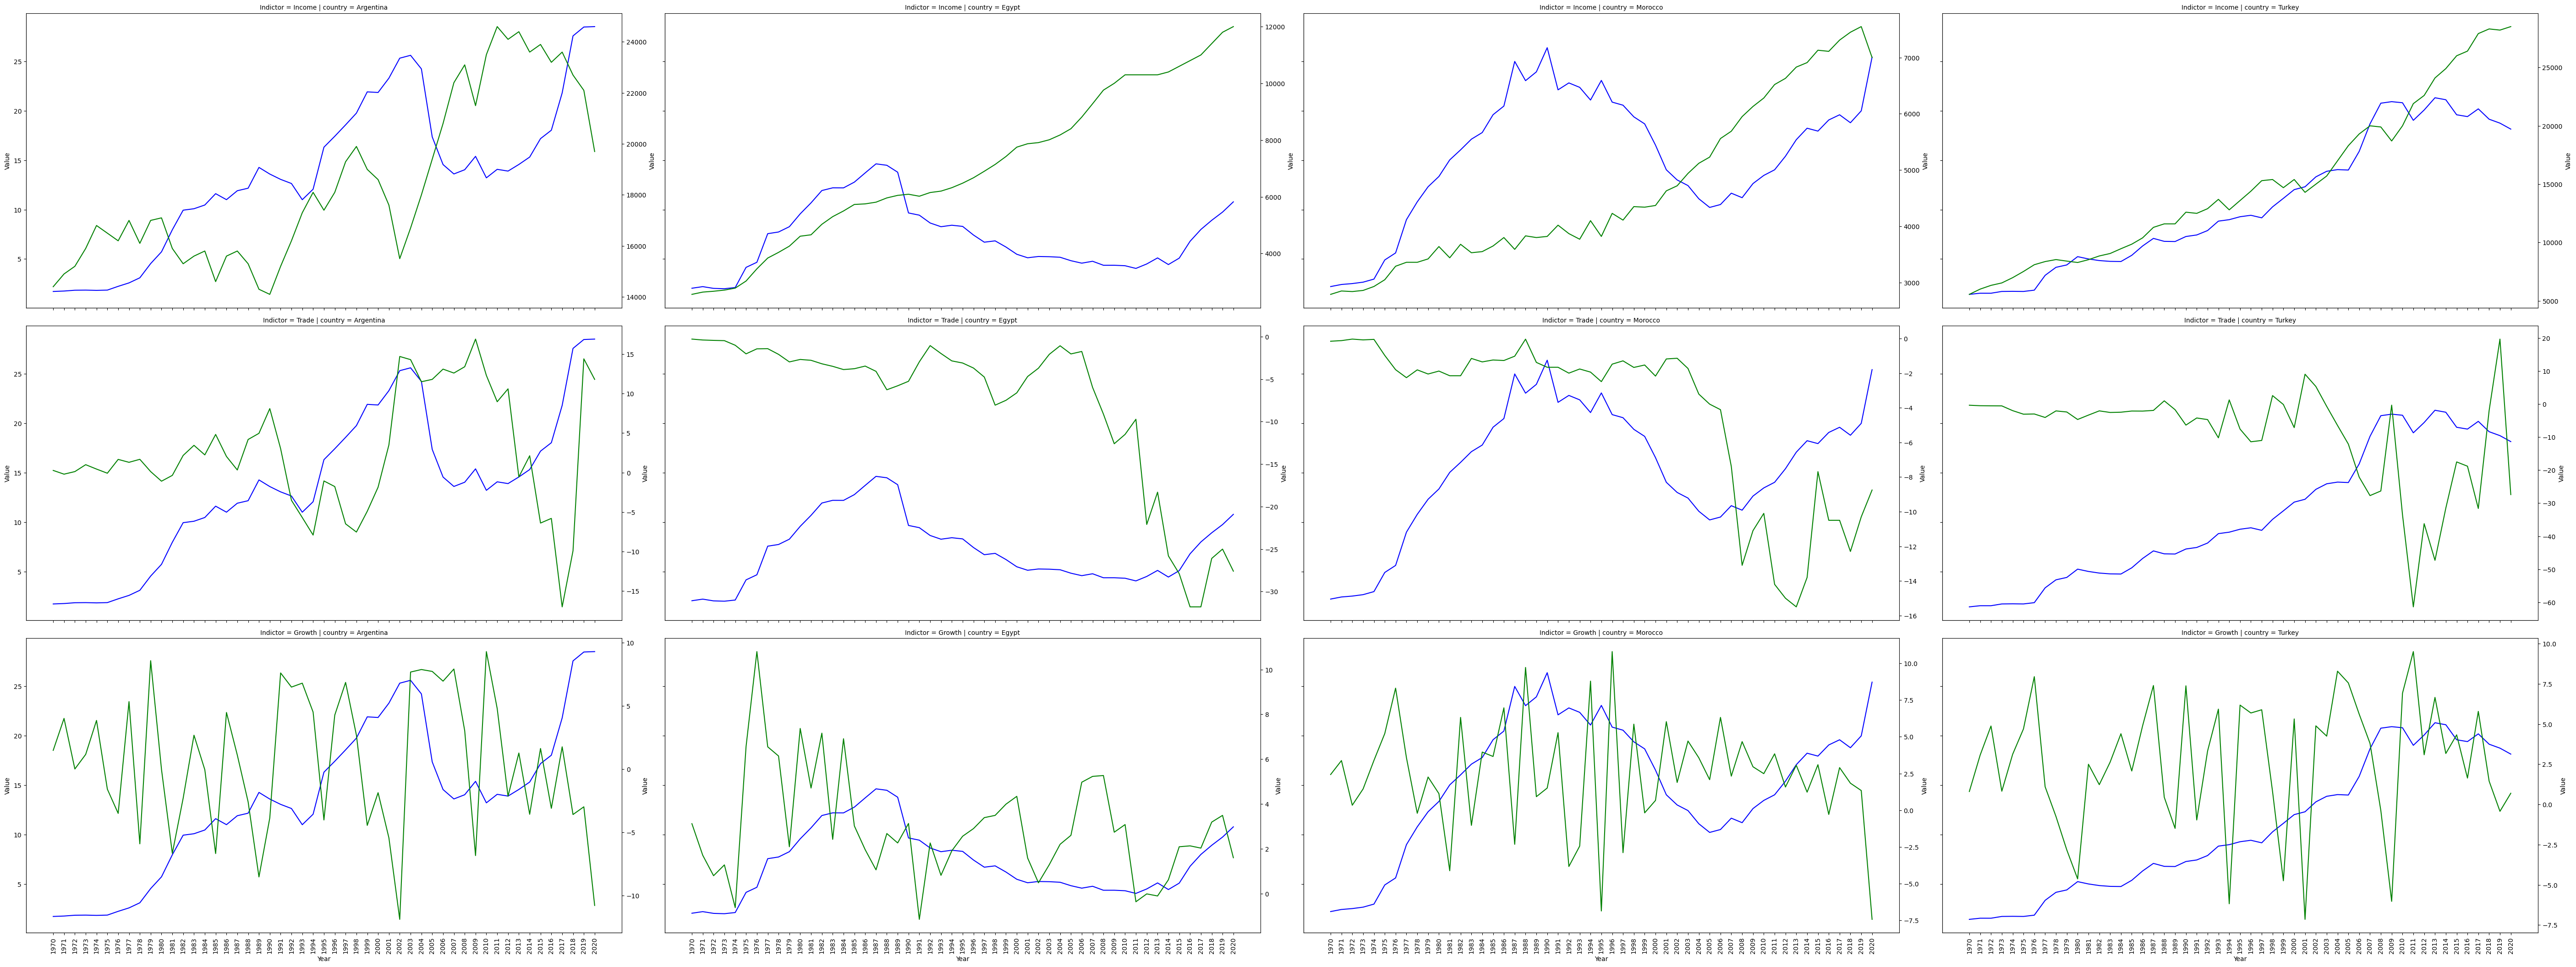

In [44]:
# Dual Axis Funcation
def twin_lineplot(x,y,color,**kwargs):
    ax = plt.twinx()
    sns.lineplot(x=x,y=y,color=color,**kwargs, ax=ax, legend = 'full')
#ploting funcation
g= sns.FacetGrid(all_data, row='Indictor',col='country',height=7, aspect=2)
g.map(sns.lineplot, 'Year', 'Debt', color='b')
g.map(twin_lineplot, 'Year', 'Value', color='g')
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
g.add_legend()
plt.show()

<a id='conclusions'></a>
## Conclusions


> To conclude, we have seen that the external borrowing is have detrimental effect of the welfare of nations. It tightens the income growth for citizen as shown in the above graph. Have a negative lagging effect on the trade balance of countries. And lastly, as it increases the GDP grow reverse trend.
To consolidate our conclusion further statistical analysis is required by using regression model or more advance model. Also, there may be other external indictors that affect our variable that were not included in our analysis. In addition to, we need to consider that correlation between variables dos not mean causation.